In [1]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as pl

In [2]:
#
# Load the data
#

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1, 28, 28,1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [3]:
#
# Build the encoder layers using 3 layers of Conv2D with MaxPooling2D
#

encoder_layers = [
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), padding='same')
]

In [8]:
#
# Decoder layers uses Conv2D followed by UpSampling2D
#
decoder_layers = [
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(8, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
]

In [9]:
autoencoder = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
] + encoder_layers + decoder_layers)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 8)          

In [11]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2986
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1414
Epoch 3/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1233
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1153
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1107
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1082
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1058
Epoch 8/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1048
Epoch 9/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1035
Epoch 10/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1023


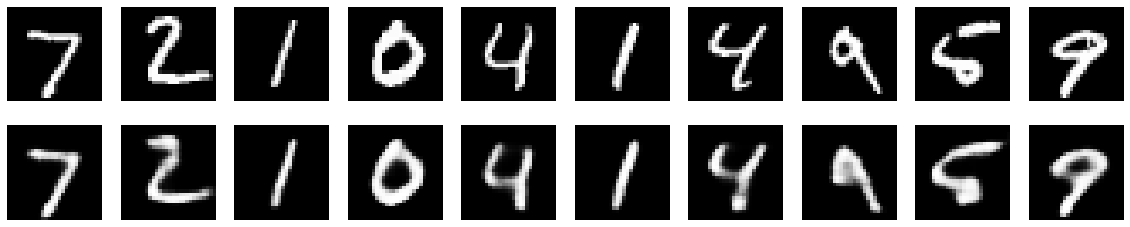

In [12]:
import my
my.plot_reconstruction(autoencoder, x_test, 10)

In [13]:
autoencoder.save('./3_deep_conv_autoencoder.model')

INFO:tensorflow:Assets written to: ./3_deep_conv_autoencoder.model/assets
